# Load the libraries and the image we are going to use

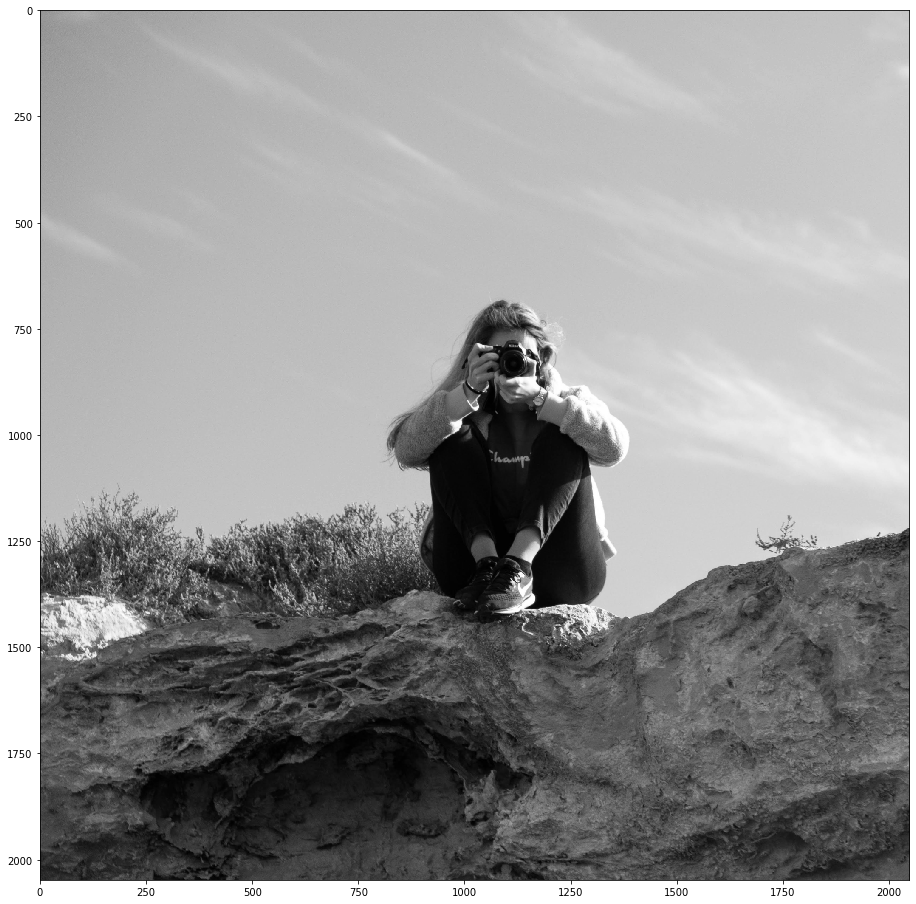

In [1]:
import cv2 
import numpy as np 
import random
from twoDDWT import *


%matplotlib inline 
from matplotlib import pyplot as plt
import pylab 
pylab.rcParams['figure.figsize'] = (20, 16) 

input_image=cv2.imread('Photographe.jpg',cv2.IMREAD_GRAYSCALE)

img = cv2.resize(input_image, (2048,2048), interpolation = cv2.INTER_AREA)  #So we have a size of 2^j for the transform.

plt.imshow(img,cmap='gray')

In [2]:
def mse(imageA, imageB):
    err = np.sum(np.sqrt((imageA.astype("float") - imageB.astype("float")) ** 2))
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err

# We are going to add different noises at the different level

## Add different levels of Gausian Noise

0.0
9.380836486816406
18.95352530479431
27.891669750213623
35.97880959510803
43.32470345497131
49.9579803943634
56.0334632396698
61.406617641448975


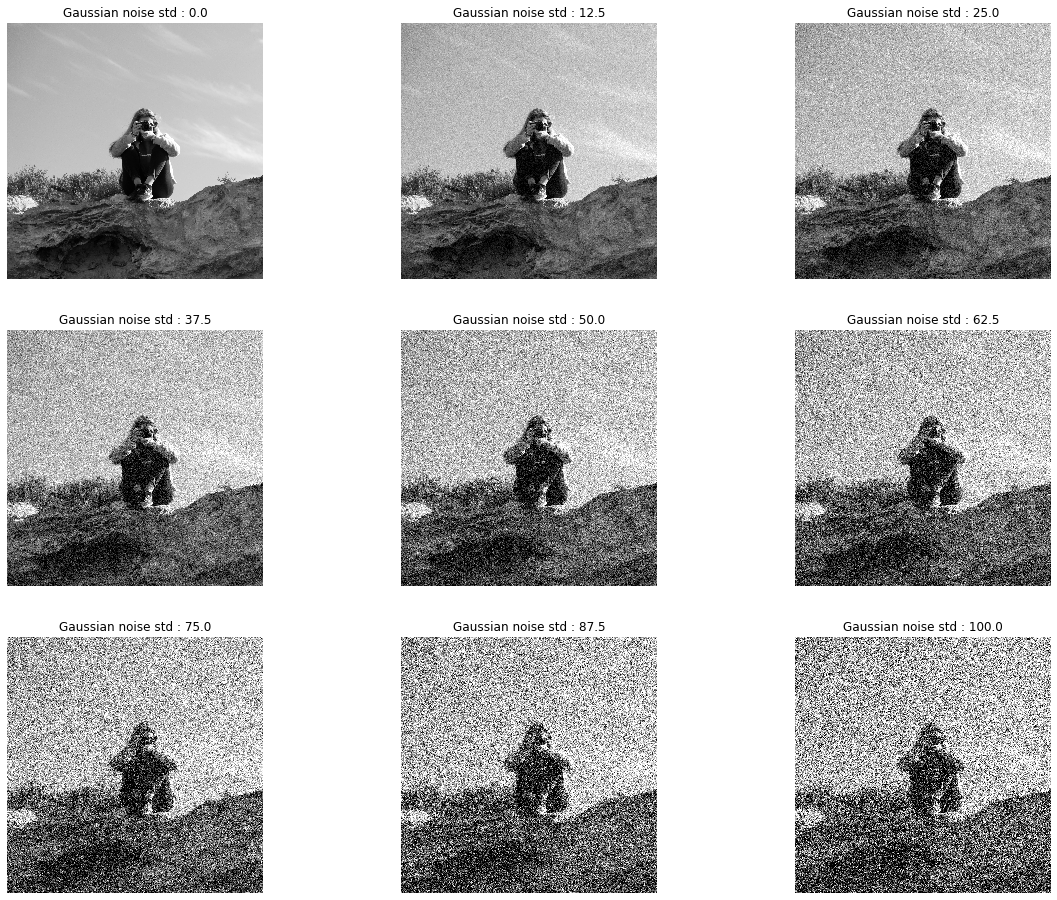

In [3]:
mean = 0.0  
Std = np.linspace(0,100,9)
Noisy_gauss = []
for std in Std:
    noisy_img = img + np.random.normal(mean, std, img.shape).astype(int)
    noisy_clip = np.clip(noisy_img, 0, 255)
    Noisy_gauss.append(noisy_clip)
    print(mse(noisy_clip,img))

pylab.rcParams['figure.figsize'] = (20, 16) 
for i in range(len(Std)):
    show = Noisy_gauss[i]
    plt.subplot(3,3,i+1)
    plt.title("Gaussian noise std : "+str(Std[i]))
    plt.axis('off')
    plt.imshow(show,cmap='gray')
plt.savefig("Gaussian noise")

# Let's see the effects of differents filters


## Gaussian blurr

1.681206464767456
3.517533779144287
4.751291513442993
5.874838829040527
7.265064477920532
9.192487239837646
11.563007116317749
14.295850276947021
17.11227536201477


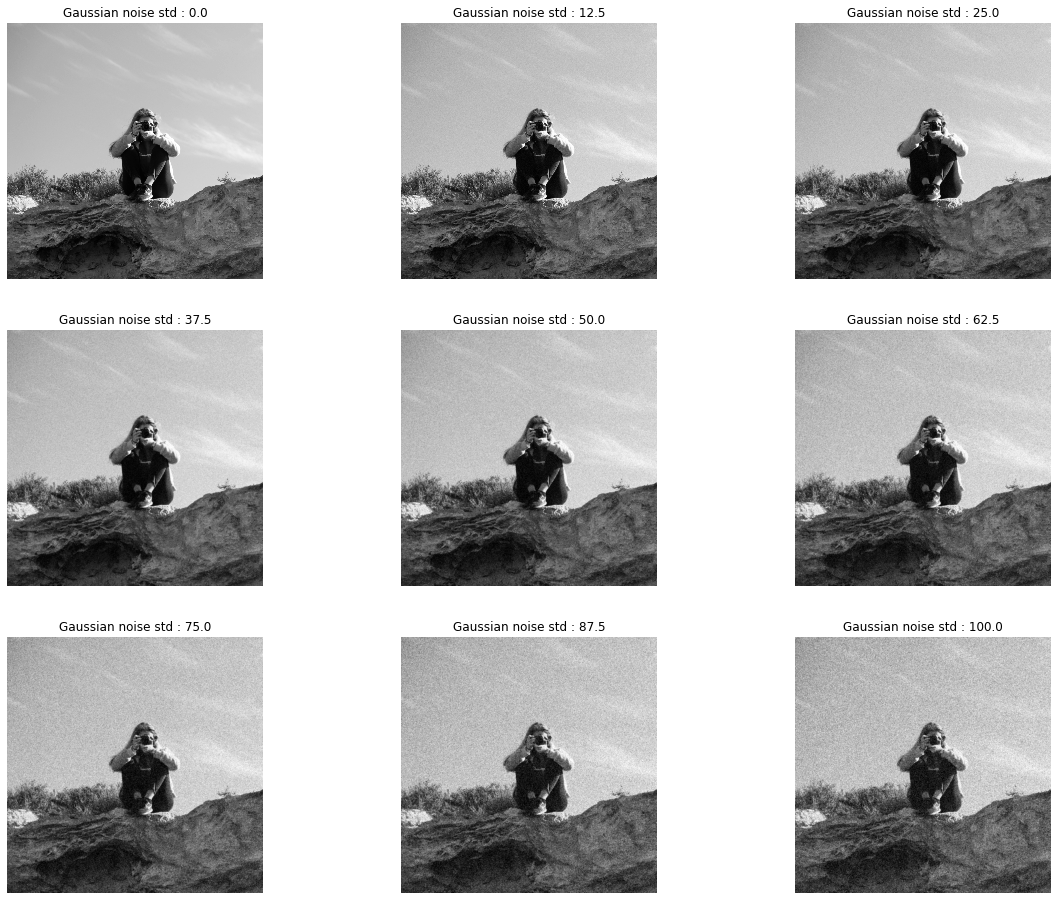

In [4]:
Gaussian_gauss = []

for i in range(len(Std)):
    mini = np.inf
    for sig in range(1,20):
        gaussian_ = np.uint8(Noisy_gauss[i])                      #Problem of unit 
        blurred_ = cv2.GaussianBlur(gaussian_,(0,0),sigmaX = sig)
        if mse(blurred_,img)< mini:
            mini = mse(blurred_,img)
            best = blurred_
    Gaussian_gauss.append(best)
    print(mini)

    
pylab.rcParams['figure.figsize'] = (20, 16) 
for i in range(len(Std)):
    show = Gaussian_gauss[i]
    plt.subplot(3,3,i+1)
    plt.title("Gaussian noise std : "+str(Std[i]))
    plt.axis('off')
    plt.imshow(show,cmap='gray')
plt.savefig("Gaussian noise filtered by Gaussian")

## Discrete Wavelet Transform

In [5]:
def thresh_detail(transform_input,scale,thresh):
    transform = np.copy(transform_input)
    (l,c) = np.shape(transform)
    for i in range(scale):
        l = l//2
        c = c//2
            
    approx = np.copy(transform[:l,:c])
    transform[np.abs(transform)<thresh] = 0
    transform[:l,:c] = approx
    return transform

def max_detail(transform_input,scale):
    transform = np.copy(transform_input)
    (l,c) = np.shape(transform)
    for i in range(scale):
        l = l//2
        c = c//2
            
    transform[:l,:c] = np.zeros((l,c))
    return np.abs(transform).max()

current image:  0
Minimum for image  0  :  0.0 

current image:  1
        New mini found:  9.368528682738543
        New mini found:  9.300793150439858
        New mini found:  9.090022176504135
        New mini found:  8.516537146642804
        New mini found:  7.246994825080037
        New mini found:  5.0884895492345095
        New mini found:  3.7087933607399464
Minimum for image  1  :  3.7087933607399464 

current image:  2
        New mini found:  18.95211947336793
        New mini found:  18.93208272382617
        New mini found:  18.865801885724068
        New mini found:  18.661970552057028
        New mini found:  18.09857764095068
        New mini found:  16.64087742008269
        New mini found:  13.462261192500591
        New mini found:  8.256881207227707
        New mini found:  5.19270995631814
Minimum for image  2  :  5.19270995631814 

current image:  3
        New mini found:  27.89139600098133
        New mini found:  27.880996704101562
        New mini found:  27.

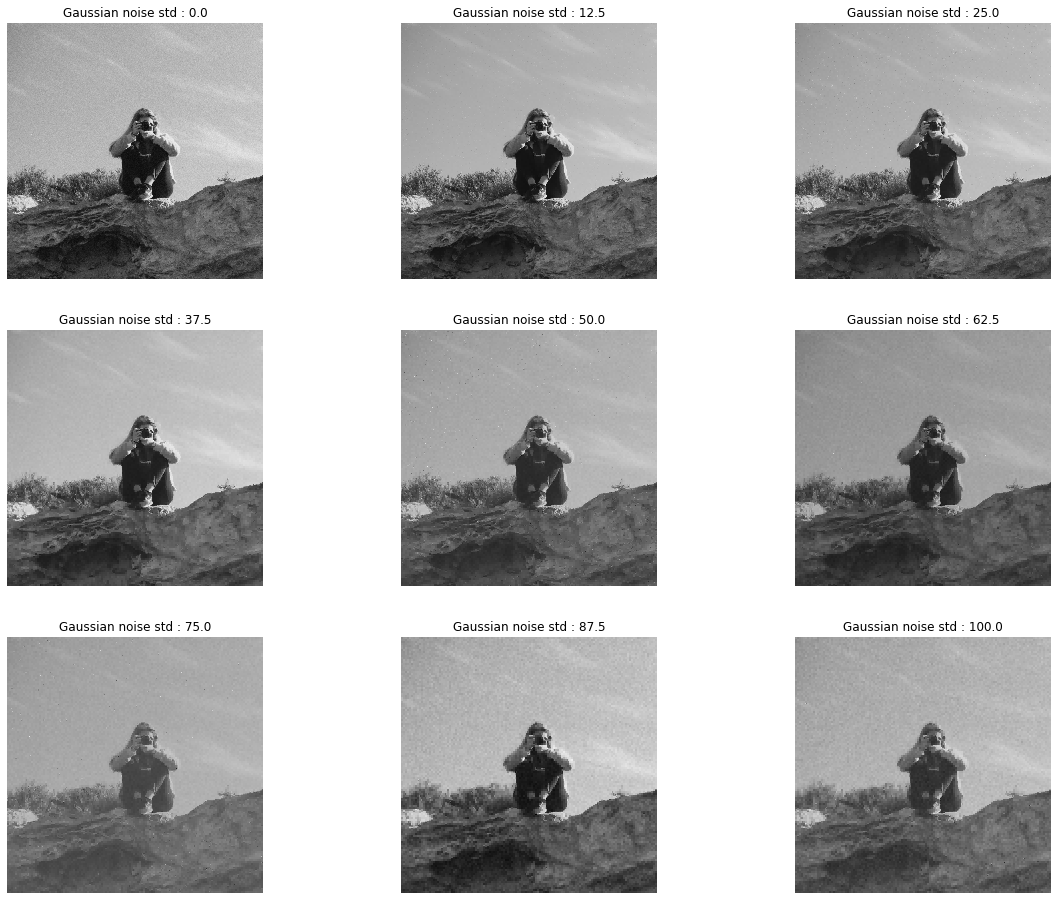

In [17]:
Gaussian_DWT = []


for i in range(len(Std)):
    print("current image: ",i)
    gaussian_ = Noisy_gauss[i]
    gaussian_ = gaussian_.astype('float64')
    mini = mse(gaussian_,img)
    scale = 4
    error_interm = []
    transform = twoDDWT(gaussian_,scale)
    maxi = max_detail(transform,scale)
    for thresh in np.logspace(0,3,20):    #This interval results from a previous bigger search
        if thresh > maxi:
            break;
        transform_tresh = thresh_detail(transform,scale,thresh)
        reconstruct = inverse_twoDDWT(transform_tresh,scale)
        error = mse(reconstruct,img)
        if error < mini:
            mini = error
            best = reconstruct
            print('        New mini found: ',mini)
        if mini<1:
            break;
    Gaussian_DWT.append(best)
    print("Minimum for image ",i," : ",mini,"\n")
    
    
pylab.rcParams['figure.figsize'] = (20, 16) 
for i in range(len(Std)):
    show = Gaussian_DWT[i]
    plt.subplot(3,3,i+1)
    plt.title("Gaussian noise std : "+str(Std[i]))
    plt.axis('off')
    plt.imshow(show,cmap='gray')
plt.savefig("Gaussian noise filtered DWT")